# EE460J Lab 1

James Lu, Soroush Famili

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5. Create another 1000 samples from another independent Gaussian with mean 10 and standard deviation 5.

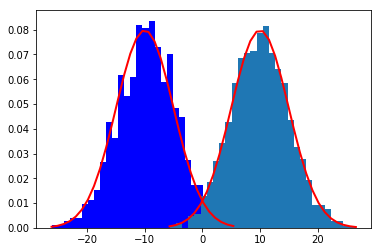

In [34]:
#generate random samples
n = 1000

mean_1 = -10
std_1 = 5
samples_1 = np.random.normal(mean_1, std_1, n)

mean_2 = 10
std_2 = 5
samples_2 = np.random.normal(mean_2, std_2, n)

#plot values
count_1, bins_1, ignored_1 = plt.hist(samples_1, bins=30, density=True, color="blue")
plt.plot(bins_1, 1/(std_1 * np.sqrt(2 * np.pi)) *
            np.exp( - (bins_1 - mean_1)**2 / (2 * std_1**2) ),
            linewidth=2, color='r')
count_2, bins_2, ignored_2 = plt.hist(samples_2, bins=30, density=True)
plt.plot(bins_2, 1/(std_2 * np.sqrt(2 * np.pi)) *
            np.exp( - (bins_2 - mean_2)**2 / (2 * std_2**2) ),
            linewidth=2, color='r')

plt.show()

**(a) Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point,
and plot the histogram of the resulting 1000 points. What do you observe?**

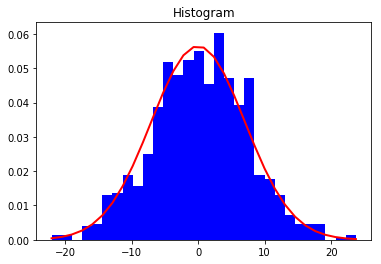

In [35]:
#compute sum
samples = samples_1 + samples_2
mean = 0
std = np.sqrt(50)

#plot values
count, bins, ignored = plt.hist(samples, bins=30, density=True, color="blue")
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
            np.exp( - (bins - mean)**2 / (2 * std**2) ),
            linewidth=2, color='r')

plt.title("Histogram")
plt.show()

I realized that the sum of these samples, which were taken from normal distributions, resulted in what looks like samples from a new normal distribution.

**(b) Estimate the mean and the variance of the sum.**

Because both these samples were taken from normal distributions, the new mean μ is the sum of the previous means (μ = μ<sub>1</sub> + μ<sub>2</sub> ≈ 0), and the new variance σ<sup>2</sup> is the sum of the previous variances (σ<sup>2</sup> = σ<sub>1</sub><sup>2</sup> + σ<sub>2</sub><sup>2</sup> ≈ 50), meaning that the new standard deviation σ ≈ 7.07

In [36]:
print("Validating findings:")
print("μ = ", samples.mean())
print("σ^2 = ", samples.var())
print("σ = ", np.sqrt(samples.var()))

Validating findings:
μ =  0.3541670073823202
σ^2 =  50.937441582823276
σ =  7.137047119280023


### 2. Central Limit Theorem


In [58]:
samples = 1000
n = 250  #num. of bernoulli rvs
bernoulli = [-1,1]  #values for bernoulli rv
result = []
for i in range(samples):
    sample = 0 #generate sample of Z_n
    for j in range(n):
        sample += np.random.choice(bernoulli)  #sum of bernoulli rvs 
    sample /= np.sqrt(n) #normalize
    result.append(sample)

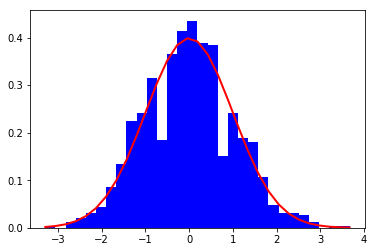

In [59]:
count, bins, ignored = plt.hist(result, bins=30, density=True, color="blue")
plt.plot(bins, 1/(1 * np.sqrt(2 * np.pi)) *
            np.exp( - (bins - 0)**2 / (2 * 1**2) ),
            linewidth=2, color='r')
plt.show()

### 3. Estimate the mean and standard deviation from 1 dimensional data: generate 25,000 samples from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean and standard deviation of this gaussian using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

In [60]:
#generate random samples
n = 25000
mean = 0
std = 5
samples = np.random.normal(mean, std, n)

In [61]:
mean_measured = 0  #compute mean for samples
for s in np.nditer(samples):
    mean_measured += s/n
    
var_measured = 0  #compute variance: squared differences from mean
for s in np.nditer(samples):
    var_measured += (s - mean_measured)**2/n
    
std_measured = np.sqrt(var_measured)  #compute standard deviation

In [62]:
print(mean_measured)
print(std_measured)

-0.050242890846550405
4.988268006913167


### 4. Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples of 2 dimensional data from the Gaussian distribution

In [73]:
n = 10000
mean = [-5,5]
covariance = [[20, .8],[.8, 30]]
samples = np.random.multivariate_normal(mean, covariance, n).T

In [77]:
mean_measured = [0, 0]
for s in np.nditer(samples[0]):
    mean_measured[0] += s/n  #measure mean for x
    
for s in np.nditer(samples[1]):
    mean_measured[1] += s/n  #measure mean for y

In [80]:
print(samples[0].mean())
print(samples[1].mean())

-5.001802932064456
4.9905612051569825


In [81]:
mean_measured

[-5.001802932064478, 4.990561205156959]